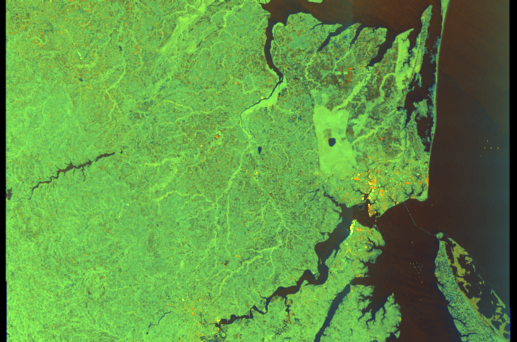

In [33]:
from IPython.display import display, Image
Image(r'C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\Data\S1A_IW_GRDH_1SDV_20230409T230639_20230409T230704_048026_05C5CE_BF89.SAFE\preview\quick-look.png')

In [34]:
import os
import arcpy
from arcpy.sa import *
arcpy.env.overwriteOutput = True

In [35]:
directory = r'C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas' ##TODO Change to input SAFE directory
outFolder = directory + '\\Output\\'

for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    if os.path.isdir(f):
        for root, dirs, files in os.walk(f):
            for file in files:
                if file.startswith('s1a-iw-grd-vv') and file.endswith('.tiff'):
                    VV = Raster(os.path.join(root, file))
                    VV_name = str(file.split('.')[0])
                    VV_name = VV_name.replace('-','_')
            for file in files:
                if file.startswith('s1a-iw-grd-vh') and file.endswith('.tiff'):
                    VH = Raster(os.path.join(root, file))
                    VH_name = str(file.split('.')[0])
                    VH_name = VH_name.replace('-','_')

if not os.path.exists(outFolder):
    os.makedirs(outFolder)

print(outFolder)
print(VV)
print(VV_name)
print(VH)
print(VH_name)

C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\Output\
C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\Data\S1A_IW_GRDH_1SDV_20230409T230639_20230409T230704_048026_05C5CE_BF89.SAFE\measurement\s1a-iw-grd-vv-20230409t230639-20230409t230704-048026-05c5ce-001.tiff
s1a_iw_grd_vv_20230409t230639_20230409t230704_048026_05c5ce_001
C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\Data\S1A_IW_GRDH_1SDV_20230409T230639_20230409T230704_048026_05C5CE_BF89.SAFE\measurement\s1a-iw-grd-vh-20230409t230639-20230409t230704-048026-05c5ce-002.tiff
s1a_iw_grd_vh_20230409t230639_20230409t230704_048026_05c5ce_002


In [36]:
Clip_Area = r"C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\Ancorage_Area.shp"
Vessel_Symbol = r"C:\Users\keit8223\Documents\ArcGIS\Projects\Sentinel Anchorage Areas\vessel_point.lyrx"

VV_Clip = outFolder + VV_name + 'clip.tif'
VV_Clip_Threshold = outFolder + VV_name + 'clip_threshold.tif'
VV_Threshold_Reclass = outFolder + VV_name + 'clip_threshold_reclass.tif'
VV_Euclidian_Distance = outFolder + VV_name + 'clip_threshold_reclass_ed.tif'
VV_Distance_Reclass = outFolder + VV_name + 'clip_threshold_reclass_ed_reclass.tif'
VV_Vessel_Polygon = directory + '\\Sentinel Anchorage Areas.gdb\\' + VV_name + '_Vessel_Polygon'
VV_Vessel_Point = directory + '\\Sentinel Anchorage Areas.gdb\\' + VV_name + '_Vessel_Point'


In [37]:
VH_Clip = outFolder + VH_name + 'clip.tif'
VH_Clip_Threshold = outFolder + VH_name + 'clip_threshold.tif'
VH_Threshold_Reclass = outFolder + VH_name + 'clip_threshold_reclass.tif'
VH_Euclidian_Distance = outFolder + VH_name + 'clip_threshold_reclass_ed.tif'
VH_Distance_Reclass = outFolder + VH_name + 'clip_threshold_reclass_ed_reclass.tif'
VH_Vessel_Polygon = directory + '\\Sentinel Anchorage Areas.gdb\\' + VH_name + '_Vessel_Polygon'
VH_Vessel_Point = directory + '\\Sentinel Anchorage Areas.gdb\\' + VH_name + '_Vessel_Point'

In [38]:
arcpy.management.Clip(
    in_raster=VV,
    rectangle="-76.1471461843248 37.1523459886121 -76.0833069397383 37.3195073802082",
    out_raster=VV_Clip,
    in_template_dataset=Clip_Area,
    nodata_value="-1",
    clipping_geometry="ClippingGeometry",
    maintain_clipping_extent="NO_MAINTAIN_EXTENT"
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Output\\s1a_iw_grd_vv_20230409t230639_20230409t230704_048026_05c5ce_001clip.tif'>

In [39]:
raster = arcpy.sa.Threshold(VV_Clip)
raster.save(VV_Clip_Threshold)

In [40]:
arcpy.management.Clip(
    in_raster=VH,
    rectangle="-76.1471461843248 37.1523459886121 -76.0833069397383 37.3195073802082",
    out_raster=VH_Clip,
    in_template_dataset=Clip_Area,
    nodata_value="-1",
    clipping_geometry="ClippingGeometry",
    maintain_clipping_extent="NO_MAINTAIN_EXTENT"
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Output\\s1a_iw_grd_vh_20230409t230639_20230409t230704_048026_05c5ce_002clip.tif'>

In [41]:
raster = arcpy.sa.Threshold(VH_Clip)
raster.save(VH_Clip_Threshold)

In [42]:
out_reclass = arcpy.sa.Reclassify(
    in_raster=VV_Clip_Threshold,
    reclass_field="Value",
    remap="0 NODATA;1 1",
    missing_values="DATA"
)
out_reclass.save(VV_Threshold_Reclass)

In [43]:
out_reclass = arcpy.sa.Reclassify(
    in_raster=VH_Clip_Threshold,
    reclass_field="Value",
    remap="0 NODATA;1 1",
    missing_values="DATA"
)
out_reclass.save(VH_Threshold_Reclass)

In [44]:
out_distance_raster = arcpy.sa.EucDistance(
    in_source_data=VV_Threshold_Reclass,
    maximum_distance=None,
    cell_size=0.000122767778050996,
    out_direction_raster=None,
    distance_method="PLANAR",
    in_barrier_data=None,
    out_back_direction_raster=None
)
out_distance_raster.save(VV_Euclidian_Distance)

In [45]:
out_distance_raster = arcpy.sa.EucDistance(
    in_source_data=VH_Threshold_Reclass,
    maximum_distance=None,
    cell_size=0.000122767778050996,
    out_direction_raster=None,
    distance_method="PLANAR",
    in_barrier_data=None,
    out_back_direction_raster=None
)
out_distance_raster.save(VH_Euclidian_Distance)

In [46]:
out_raster = arcpy.sa.Reclassify(
    in_raster=VV_Euclidian_Distance,
    reclass_field="VALUE",
    remap="0 0.000443 1;0.000443 1 NODATA",
    missing_values="NODATA"
)
out_raster.save(VV_Distance_Reclass)

In [47]:
out_raster = arcpy.sa.Reclassify(
    in_raster=VH_Euclidian_Distance,
    reclass_field="VALUE",
    remap="0 0.000443 1;0.000443 1 NODATA",
    missing_values="NODATA"
)
out_raster.save(VH_Distance_Reclass)

In [48]:
arcpy.conversion.RasterToPolygon(
    in_raster=VV_Distance_Reclass,
    out_polygon_features=VV_Vessel_Polygon,
    simplify="NO_SIMPLIFY",
    raster_field="Value",
    create_multipart_features="SINGLE_OUTER_PART",
    max_vertices_per_feature=None
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Sentinel Anchorage Areas.gdb\\s1a_iw_grd_vv_20230409t230639_20230409t230704_048026_05c5ce_001_Vessel_Polygon'>

In [49]:
arcpy.conversion.RasterToPolygon(
    in_raster=VH_Distance_Reclass,
    out_polygon_features=VH_Vessel_Polygon,
    simplify="NO_SIMPLIFY",
    raster_field="Value",
    create_multipart_features="SINGLE_OUTER_PART",
    max_vertices_per_feature=None
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Sentinel Anchorage Areas.gdb\\s1a_iw_grd_vh_20230409t230639_20230409t230704_048026_05c5ce_002_Vessel_Polygon'>

In [50]:
arcpy.management.FeatureToPoint(
    in_features=VV_Vessel_Polygon,
    out_feature_class=VV_Vessel_Point,
    point_location="INSIDE"
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Sentinel Anchorage Areas.gdb\\s1a_iw_grd_vv_20230409t230639_20230409t230704_048026_05c5ce_001_Vessel_Point'>

In [51]:
arcpy.management.FeatureToPoint(
    in_features=VH_Vessel_Polygon,
    out_feature_class=VH_Vessel_Point,
    point_location="INSIDE"
)

<Result 'C:\\Users\\keit8223\\Documents\\ArcGIS\\Projects\\Sentinel Anchorage Areas\\Sentinel Anchorage Areas.gdb\\s1a_iw_grd_vh_20230409t230639_20230409t230704_048026_05c5ce_002_Vessel_Point'>

In [52]:
# arcpy.management.ApplySymbologyFromLayer(
#     in_layer=Vessel_Point,
#     in_symbology_layer=Vessel_Symbol,
#     symbology_fields=None,
#     update_symbology="DEFAULT"
# )